## **Prelims Skills Exam**

**Name:** Tacsay, Marie Emmanuelle
<br> **Section:** CPE32S8
<br> **Instructor:** Engr. Roman Richard

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

## **PRE-PROCESSING OF DATA**

In [325]:
#pre-processing of data
xray_df = pd.read_csv(r"C:\Users\emtac\Documents\PRELIMS_DATASCIENCE\Data_Entry_2017.csv")
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join(r"C:\Users\emtac\Documents\PRELIMS_DATASCIENCE\WholeData_PRELIMS_DS3",'images_*','images*','*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', xray_df.shape[0])
xray_df['path'] = xray_df['Image Index'].map(all_image_paths.get)
xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
10715,00002774_001.png,Infiltration,1,2774,30,M,PA,2048,2500,0.171,0.171,NaN,C:\Users\emtac\Documents\PRELIMS_DATASCIENCE\W...
74066,00018213_001.png,Nodule,1,18213,41,M,AP,2048,2500,0.168,0.168,NaN,C:\Users\emtac\Documents\PRELIMS_DATASCIENCE\W...
18537,00004917_007.png,No Finding,7,4917,49,M,AP,2500,2048,0.171,0.171,NaN,C:\Users\emtac\Documents\PRELIMS_DATASCIENCE\W...


In [326]:
#cleaning of data
xray_df['Finding Labels'] = xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        xray_df[c_label] = xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
xray_df.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
98574,00026060_000.png,Infiltration,0,26060,50,M,PA,2806,2991,0.143,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
61813,00015275_003.png,,3,15275,44,M,PA,2982,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59687,00014731_022.png,Emphysema|Nodule,22,14731,55,M,PA,2500,2048,0.168,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [327]:
all_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [328]:
xray_df = xray_df.drop('Unnamed: 11', axis= 1)
xray_df.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if xray_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


In [330]:
xray_df['disease_vec'] = xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [331]:
xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,disease_vec
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
3,00000002_000.png,,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
112116,00030802_000.png,,0,30802,29,M,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
112117,00030803_000.png,,0,30803,42,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
112118,00030804_000.png,,0,30804,30,F,PA,2048,2500,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [332]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(xray_df,
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', test_df.shape[0])

train 84090 validation 28030


In [333]:
test_df['newLabel'] = test_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

In [557]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (64,64)
data_gen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [558]:
train_gen = data_gen.flow_from_dataframe(dataframe=train_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                            color_mode = 'grayscale',
                            batch_size = 32)

valid_gen = data_gen.flow_from_dataframe(dataframe=test_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                            color_mode = 'grayscale',
                            batch_size = 256) # we can use much larger batches for evaluation

test_X, test_Y = next(data_gen.flow_from_dataframe(dataframe=test_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                            color_mode = 'grayscale',
                            batch_size = 1024))

Found 38736 validated image filenames belonging to 13 classes.
Found 12913 validated image filenames belonging to 13 classes.
Found 12913 validated image filenames belonging to 13 classes.


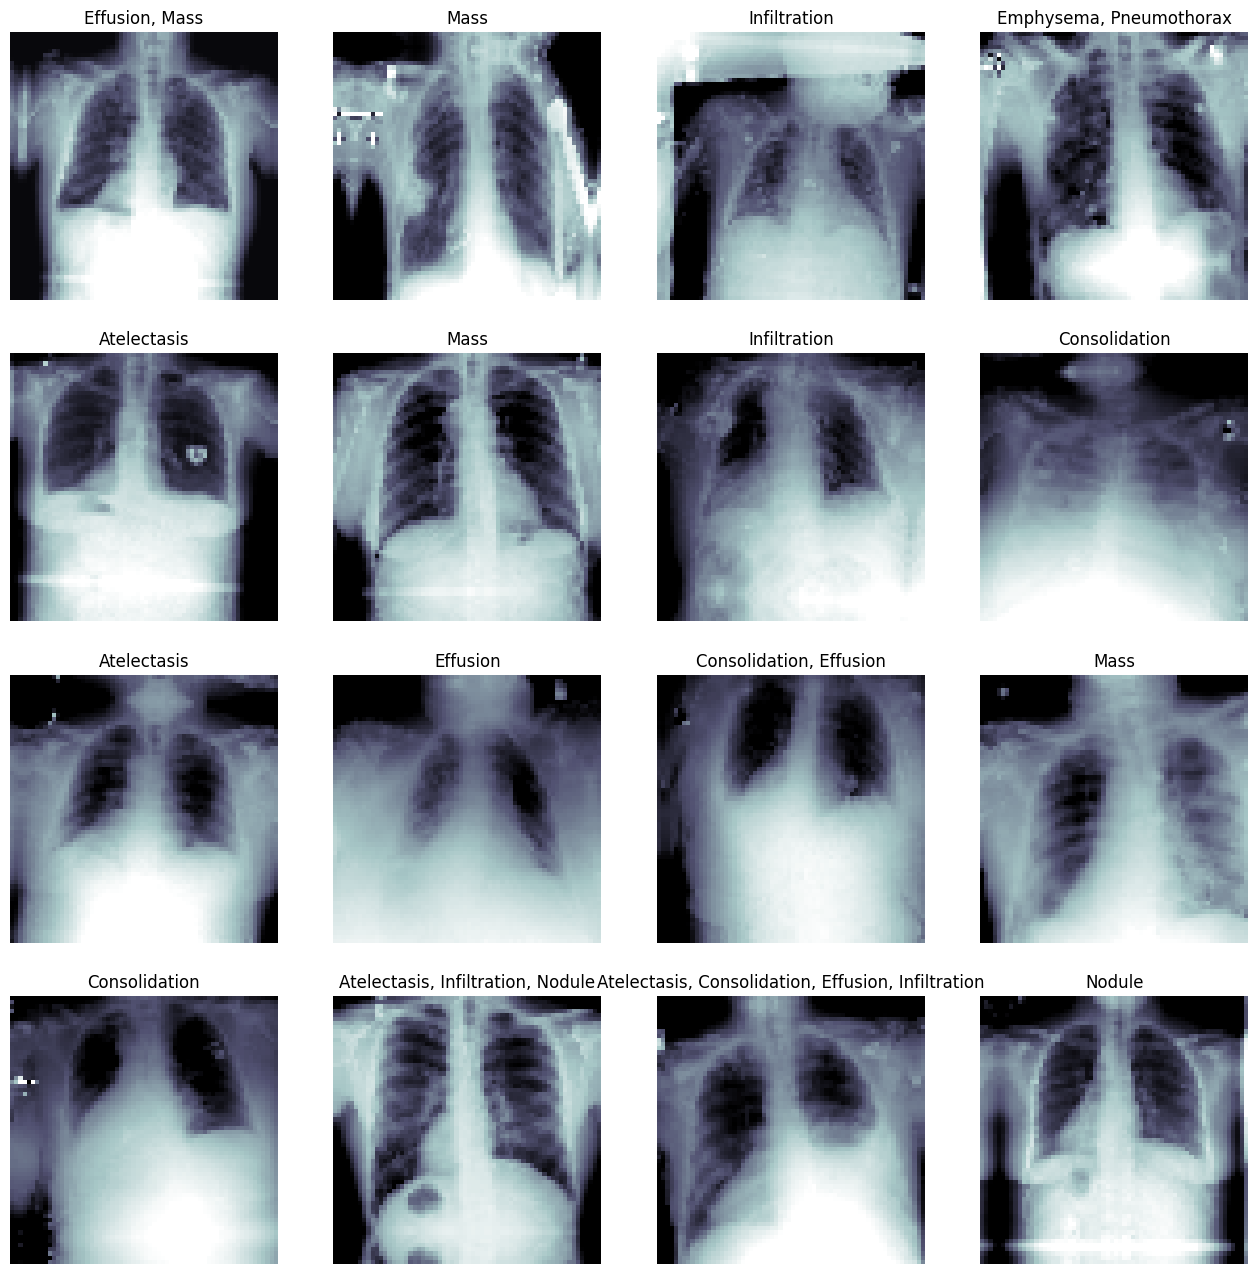

In [559]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

## **CREATING OF OWN MODEL**

In [560]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= (64,64,1)))
model.add(Activation('relu'))

## Another 3x3 convolution with 2x2 stride and 32 filters
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(len(all_labels)))
model.add(Activation('sigmoid'))


c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [561]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_112 (Activation)     │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_113 (Activation)     │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_114 (Activation)     │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_115 (Activation)     │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_114 (Dropout)           │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_38 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_116 (Activation)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_115 (Dropout)           │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 13)             │         6,669 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_117 (Activation)     │ (None, 13)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,468,397 (9.42 MB)

 Trainable params: 2,468,397 (9.42 MB)

 Non-trainable params: 0 (0.00 B)

In [562]:
opt = Adam(learning_rate= 0.001)
model.compile(optimizer = opt, loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('xray_class')

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5)

history = model.fit(train_gen,
            validation_data = (test_X, test_Y),
            steps_per_epoch= 100, 
            epochs = 20,
            verbose = 1,
            callbacks= early)

Epoch 1/20


c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 527ms/step - binary_accuracy: 0.8572 - loss: 0.3703 - val_binary_accuracy: 0.8770 - val_loss: 0.3616
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 454ms/step - binary_accuracy: 0.8788 - loss: 0.3234 - val_binary_accuracy: 0.8769 - val_loss: 0.3562
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 496ms/step - binary_accuracy: 0.8773 - loss: 0.3298 - val_binary_accuracy: 0.8770 - val_loss: 0.3393
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 532ms/step - binary_accuracy: 0.8809 - loss: 0.3169 - val_binary_accuracy: 0.8781 - val_loss: 0.3370
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 507ms/step - binary_accuracy: 0.8779 - loss: 0.3276 - val_binary_accuracy: 0.8776 - val_loss: 0.3253
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 524ms/step - binary_accuracy: 0.8791 - loss: 0.3241 - val_binary_accuracy: 0.8770 - val_loss: 0.3238
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 476ms/step - binary_accuracy: 0.8783 - loss: 0.3202 - val_binary_accuracy: 0.8783 - val_loss: 0.3

c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - binary_accuracy: 0.8831 - loss: 0.2942 - val_binary_accuracy: 0.8770 - val_loss: 0.3209
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 463ms/step - binary_accuracy: 0.8802 - loss: 0.3174 - val_binary_accuracy: 0.8778 - val_loss: 0.3218
Epoch 15/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 507ms/step - binary_accuracy: 0.8785 - loss: 0.3168 - val_binary_accuracy: 0.8770 - val_loss: 0.3237
Epoch 16/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 496ms/step - binary_accuracy: 0.8771 - loss: 0.3202 - val_binary_accuracy: 0.8774 - val_loss: 0.3229
Epoch 17/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 492ms/step - binary_accuracy: 0.8805 - loss: 0.3158 - val_binary_accuracy: 0.8785 - val_loss: 0.3208
Epoch 18/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 429ms/step - binary_accuracy: 0.8807 - loss: 0.3150 - val_binary_accuracy: 0.8770 - val_loss: 0.3328
Epoch 19/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 443ms/step - binary_accuracy: 0.8808 - loss: 0.3187 - val_binary_accuracy: 0.8779 - val_loss:

## **TEST LOSS AND ACCURACY**

In [563]:
score = model.evaluate(valid_gen, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31312960386276245
Test accuracy: 0.8800850510597229


In [564]:
history.history.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

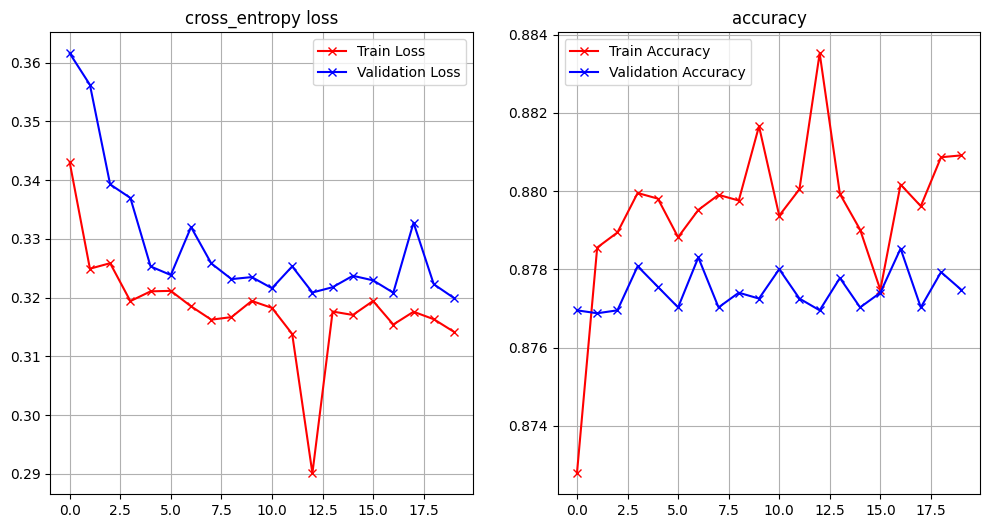

In [565]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["binary_accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_binary_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

## **ROC-AUC CURVE**

In [513]:
pred_Y = model.predict(test_X, batch_size = 32, verbose = True)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


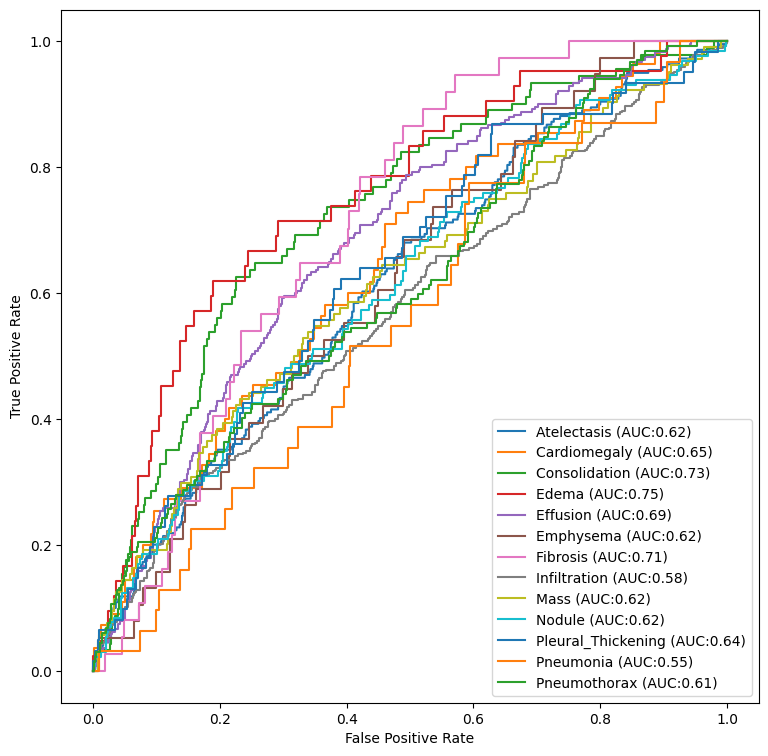

In [514]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

## **CONFUSION MATRIX**

In [566]:
#model
from sklearn.metrics import confusion_matrix
y_true_d = np.argmax(test_Y,axis = 1)
pred_Y = model.predict(test_X)
pred = np.argmax(pred_Y,axis = 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


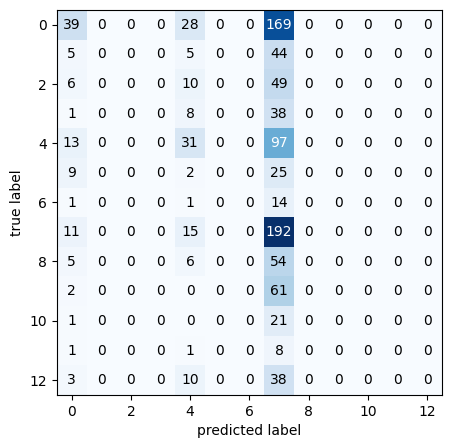

In [567]:
#model
CM = confusion_matrix(y_true_d, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## **CLASSIFICATION REPORT**

In [568]:
from sklearn.metrics import classification_report
print(classification_report(y_true_d, pred))

              precision    recall  f1-score   support

           0       0.40      0.17      0.23       236
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00        65
           3       0.00      0.00      0.00        47
           4       0.26      0.22      0.24       141
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00        16
           7       0.24      0.88      0.37       218
           8       0.00      0.00      0.00        65
           9       0.00      0.00      0.00        63
          10       0.00      0.00      0.00        22
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        51

    accuracy                           0.26      1024
   macro avg       0.07      0.10      0.07      1024
weighted avg       0.18      0.26      0.17      1024



c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# **PRE-TRAINED MODEL**

In [515]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (224,224)
data_gen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [516]:
train_gen = data_gen.flow_from_dataframe(dataframe=train_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                            batch_size = 32)

valid_gen = data_gen.flow_from_dataframe(dataframe=test_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                            batch_size = 256) # we can use much larger batches for evaluation

test_X, test_Y = next(data_gen.flow_from_dataframe(dataframe=test_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                            batch_size = 1024))

Found 38736 validated image filenames belonging to 13 classes.
Found 12913 validated image filenames belonging to 13 classes.
Found 12913 validated image filenames belonging to 13 classes.


## **VGG16**

In [529]:
from keras.applications import VGG16, DenseNet201
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D

In [530]:
# VGG16
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

## **FINE TUNING OF THE MODEL**

In [531]:
# Set the base model's layers as non-trainable
for layer in base_model_vgg16.layers[:-1]:
    layer.trainable = False

In [532]:
from keras.models import Model
x = base_model_vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(all_labels), activation='sigmoid')(x)
model1 = Model(inputs=base_model_vgg16.input, outputs=predictions)

In [533]:
# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.003), 
                         loss='binary_crossentropy', 
                         metrics=['binary_accuracy'])
model1.summary()

Model: "functional_416"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_101 (InputLayer)    │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_14     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_106 (Dropout)           │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 13)             │         6,669 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,984,013 (57.16 MB)

 Trainable params: 269,325 (1.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [534]:
# Train the model
history_vgg16 = model1.fit(train_gen,
                                epochs=10,
                                steps_per_epoch=100,
                                validation_data= (test_X, test_Y),
                                verbose=1)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - binary_accuracy: 0.8508 - loss: 0.3967 - val_binary_accuracy: 0.8758 - val_loss: 0.3294
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - binary_accuracy: 0.8781 - loss: 0.3343 - val_binary_accuracy: 0.8761 - val_loss: 0.3270
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - binary_accuracy: 0.8805 - loss: 0.3191 - val_binary_accuracy: 0.8758 - val_loss: 0.3266
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - binary_accuracy: 0.8743 - loss: 0.3377 - val_binary_accuracy: 0.8758 - val_loss: 0.3235
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - binary_accuracy: 0.8802 - loss: 0.3307 - val_binary_accuracy: 0.8776 - val_loss: 0.3249
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - binary_accuracy: 0.8804 - loss: 0.3249 - val_binary_accuracy: 0.8758 - val_loss: 0.3275
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - binary_accuracy: 0.8758 - loss: 0.3364 - val_binary_accuracy: 0.8760 - val_loss: 0.3248

## **TEST LOSS AND ACCURACY**

In [535]:
score = model1.evaluate(valid_gen, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.32258644700050354
Test accuracy: 0.8797098398208618


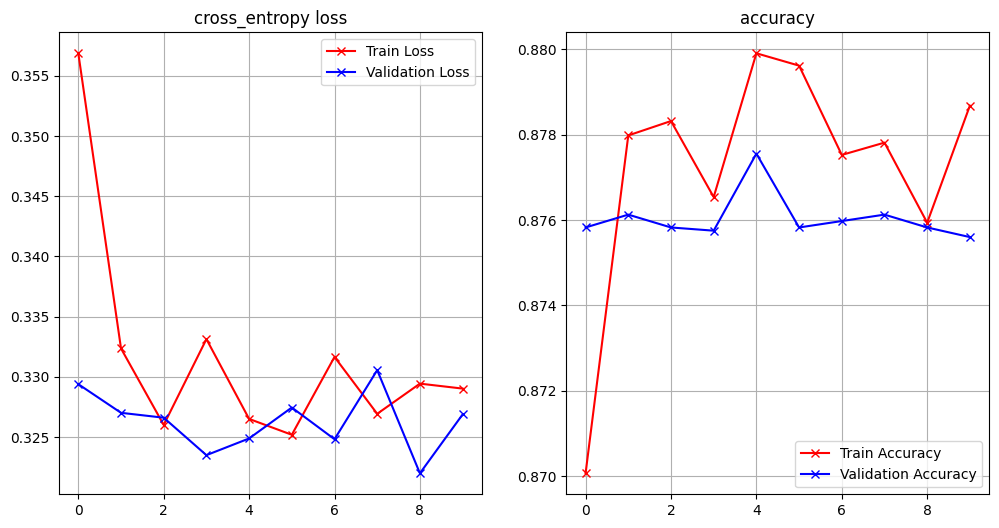

In [536]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_vgg16.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_vgg16.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_vgg16.history["binary_accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_vgg16.history["val_binary_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

## **ROC-AUC CURVE**

In [537]:
pred_Y_vg = model1.predict(test_X, batch_size = 32, verbose = True)

32/32 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step


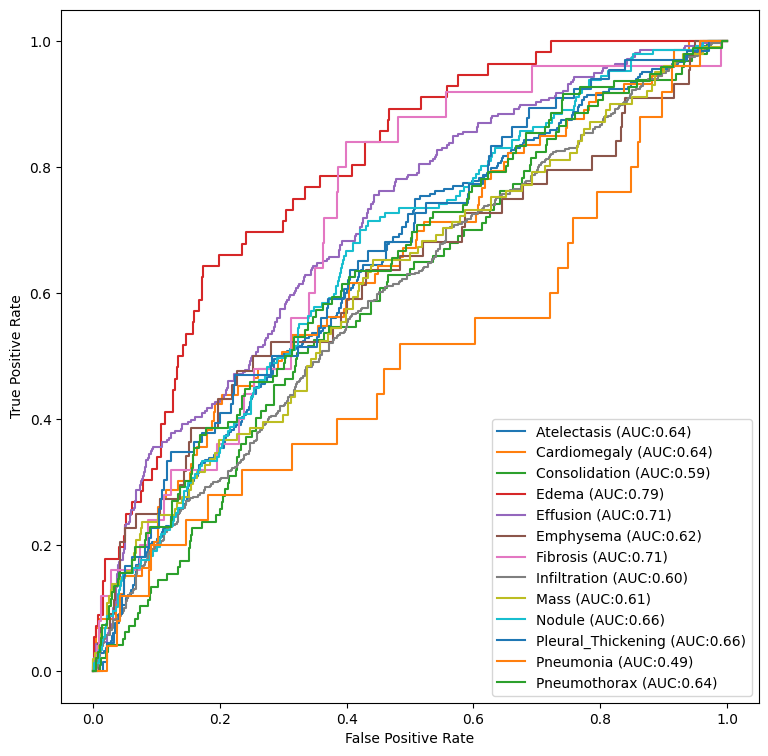

In [538]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y_vg[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

## **CONFUSION MATRIX**

In [539]:
#model1
from sklearn.metrics import confusion_matrix
y_true_d = np.argmax(test_Y,axis = 1)
pred_Y = model1.predict(test_X)
pred = np.argmax(pred_Y,axis = 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step


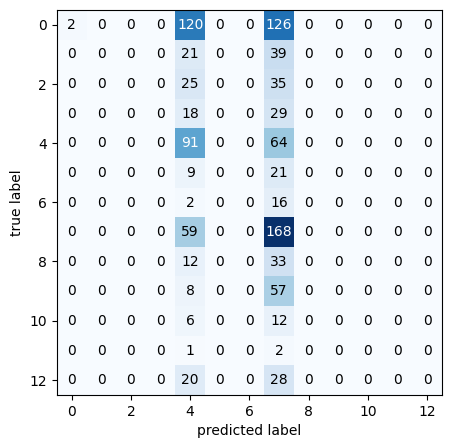

In [540]:
#model1
CM = confusion_matrix(y_true_d, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## **CLASSIFICATION REPORT**

In [541]:
from sklearn.metrics import classification_report
print(classification_report(y_true_d, pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       248
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        47
           4       0.23      0.59      0.33       155
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        18
           7       0.27      0.74      0.39       227
           8       0.00      0.00      0.00        45
           9       0.00      0.00      0.00        65
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        48

    accuracy                           0.25      1024
   macro avg       0.12      0.10      0.06      1024
weighted avg       0.34      0.25      0.14      1024



c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## **DESNET**

In [542]:
# DenseNet
base_model_dense = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

## **FINE TUNING OF THE MODEL**

In [545]:
# Set the base model's layers as non-trainable
for layer in base_model_dense.layers[:-1]:
    layer.trainable = False

In [546]:
from keras.models import Model
x = base_model_dense.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(all_labels), activation='sigmoid')(x)
model2 = Model(inputs=base_model_dense.input, outputs=predictions)

In [547]:
# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.003), 
                         loss='binary_crossentropy', 
                         metrics=['binary_accuracy'])
model2.summary()

Model: "functional_420"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_102     │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 230, 230,  │          0 │ input_layer_102[… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 19,312,205 (73.67 MB)

 Trainable params: 990,221 (3.78 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [548]:
# Train the model
history_dense = model2.fit(train_gen,
                                epochs=10,
                                steps_per_epoch=100,
                                validation_data= (test_X, test_Y),
                                verbose=1)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - binary_accuracy: 0.8390 - loss: 0.4579 - val_binary_accuracy: 0.8758 - val_loss: 0.3294
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - binary_accuracy: 0.8767 - loss: 0.3421 - val_binary_accuracy: 0.8758 - val_loss: 0.3279
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - binary_accuracy: 0.8774 - loss: 0.3380 - val_binary_accuracy: 0.8761 - val_loss: 0.3229
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - binary_accuracy: 0.8757 - loss: 0.3430 - val_binary_accuracy: 0.8758 - val_loss: 0.3198
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - binary_accuracy: 0.8780 - loss: 0.3344 - val_binary_accuracy: 0.8770 - val_loss: 0.3260
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - binary_accuracy: 0.8782 - loss: 0.3369 - val_binary_accuracy: 0.8761 - val_loss: 0.3279
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - binary_accuracy: 0.8776 - loss: 0.3328 - val_binary_accuracy: 0.8760 - val_loss: 0.3223

## **TEST LOSS AND ACCURACY**

In [549]:
score = model2.evaluate(valid_gen, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31870874762535095
Test accuracy: 0.8793763518333435


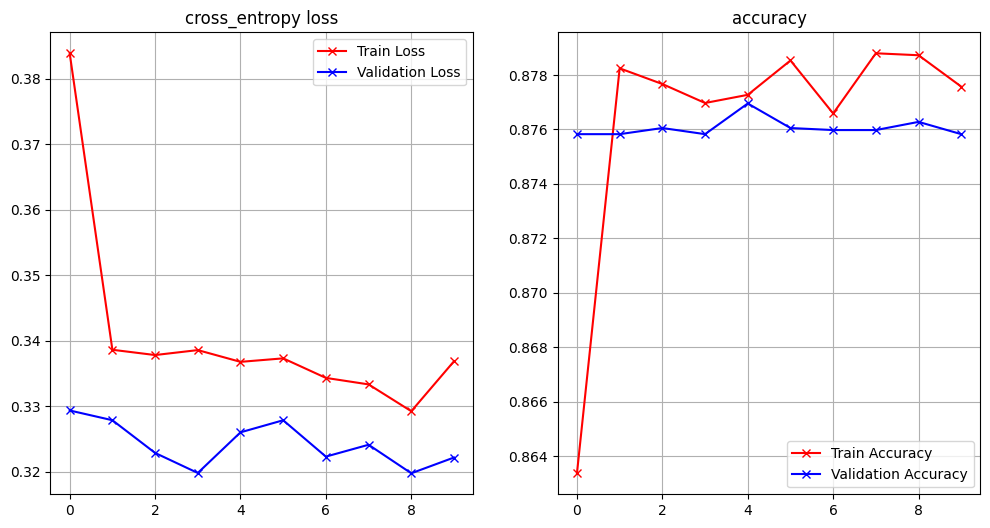

In [550]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history_dense.history["loss"],'r-x', label="Train Loss")
    ax.plot(history_dense.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history_dense.history["binary_accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history_dense.history["val_binary_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

## **ROC-AUC CURVE**

In [551]:
pred_Y_dense = model2.predict(test_X, batch_size = 32, verbose = True)

32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step


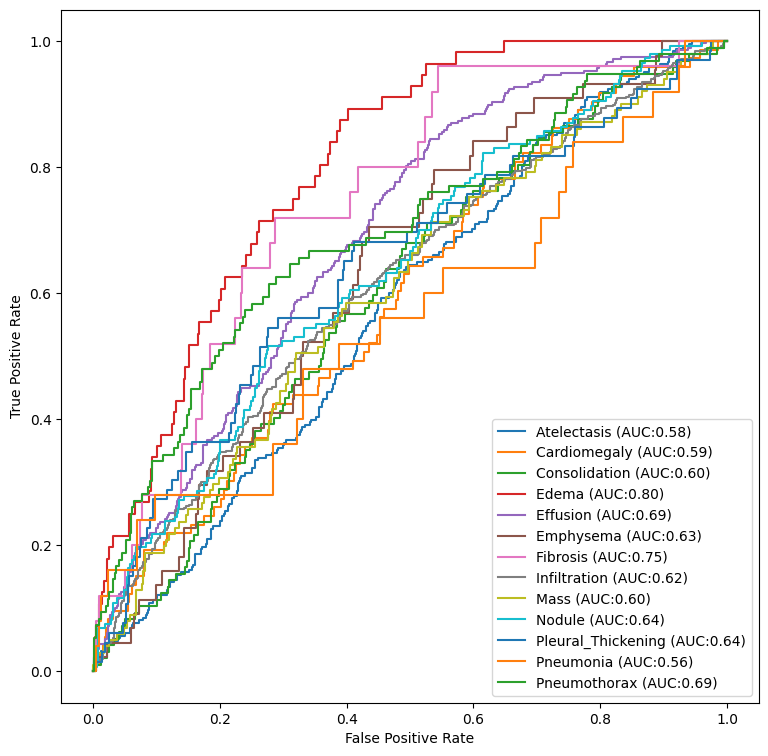

In [552]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y_dense[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

## **CONFUSION MATRIX**

In [553]:
#model2
from sklearn.metrics import confusion_matrix
y_true_d = np.argmax(test_Y,axis = 1)
pred_Y = model2.predict(test_X)
pred = np.argmax(pred_Y,axis = 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step


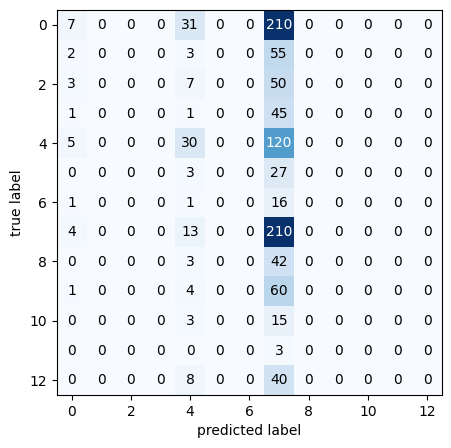

In [554]:
#model2
CM = confusion_matrix(y_true_d, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## **CLASSIFICATION REPORT**

In [555]:
from sklearn.metrics import classification_report
print(classification_report(y_true_d, pred))

              precision    recall  f1-score   support

           0       0.29      0.03      0.05       248
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        47
           4       0.28      0.19      0.23       155
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        18
           7       0.24      0.93      0.38       227
           8       0.00      0.00      0.00        45
           9       0.00      0.00      0.00        65
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        48

    accuracy                           0.24      1024
   macro avg       0.06      0.09      0.05      1024
weighted avg       0.17      0.24      0.13      1024



c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emtac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## **VALIDATION OF DATA**

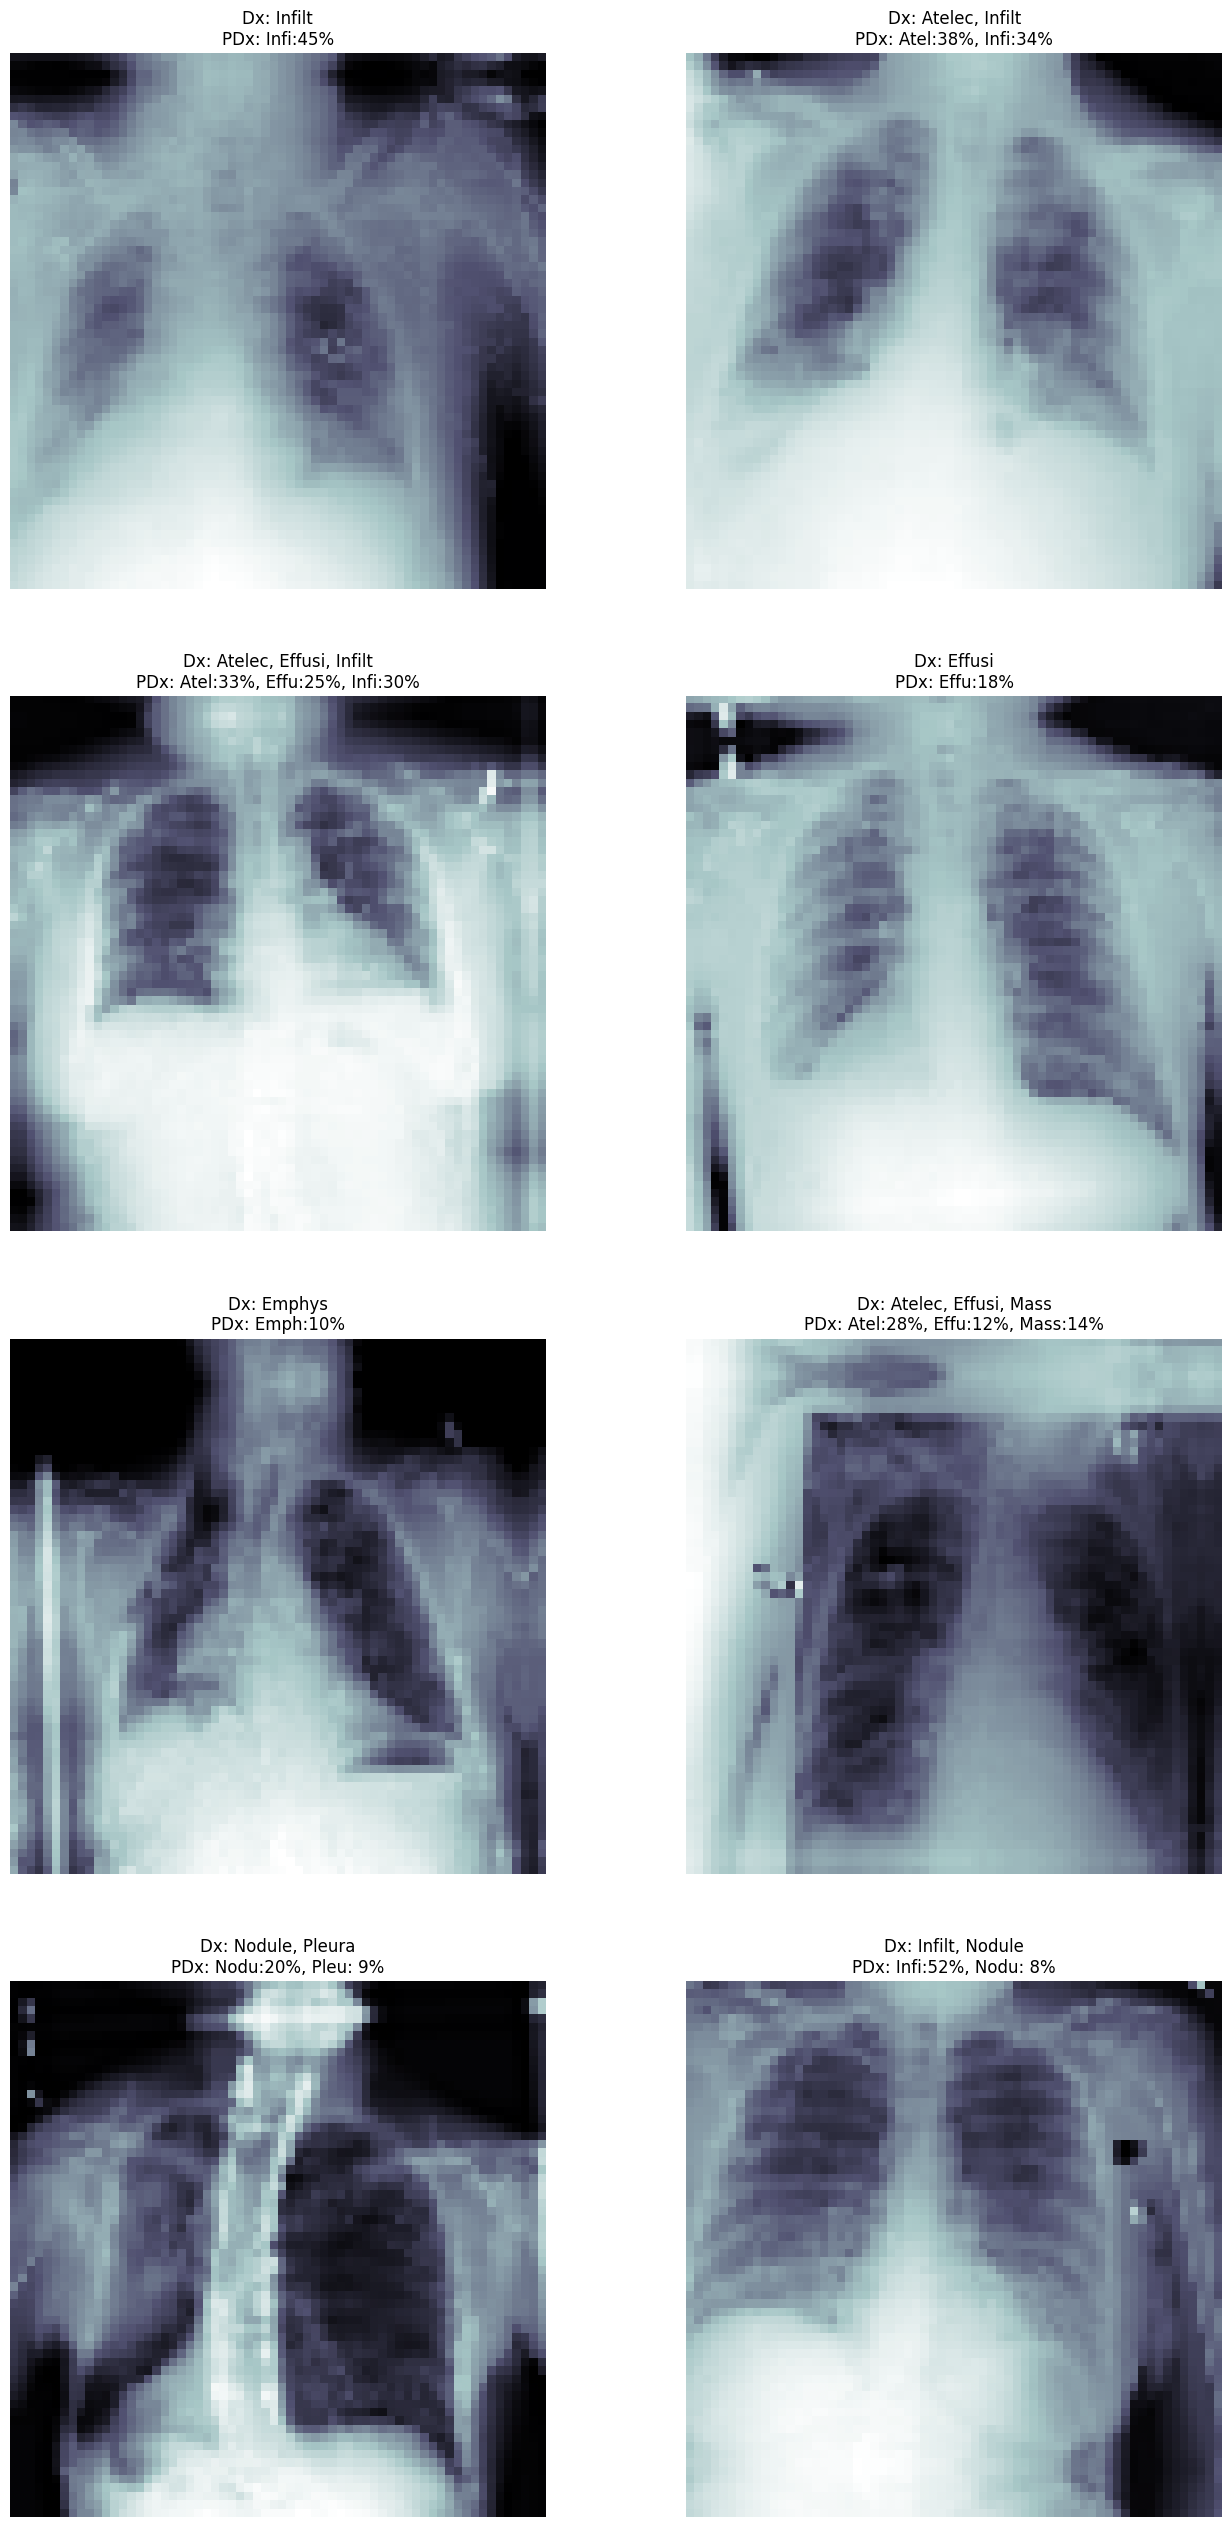

In [569]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels, 
                                                                  test_Y[idx]) 
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels, 
                                                                  test_Y[idx], pred_Y[idx]) 
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')

### **Conclusion:**
This skills exam measures our capabilities in solving a given problem through applying he concepts that we have learned for this period. The data that have provided contained a 112,120 images that we need to pre-process and fit into the model for the purpose of image classification. Applying our knowledge should be evident in our own works. With these, we are required to meet the 85% and above accuracy for the model that we've created and a 95% and above accuracy for the fine-tuned pre-trained models. I was able to create and fine-tuned a pre-trained model but I was not able to meet the standard imposed for the fine-tuned pre-trained model. On the other hand, I was able to obtained an 88.0% accuracy on the model that I have created. This shows that the data that have gathered may be one of the reasons on why the model achieved these results. Also, the challenging part is the pre-processing of data wherein the data should be transformed into a csv file and the code would transform each paths into a pixel since each path is assigned in a single photo. Overall, this exam test our skills and knowledge on how to analyze and solve problem using the concept that we have learned in prelims period which is about the field of deep learning.